# Encoding Numerical Data - Discretization and Binarization

In [91]:
import pandas as pd

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [ ]:
df = pd.read_csv('Datasets/house_purchased.csv')

In [94]:
df.head()

,price,area,purchased
0,13300000,7420,0
1,12250000,8960,1
2,12250000,9960,1
3,12215000,7500,1
4,11410000,7420,0


In [95]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

### Train test split

In [96]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

### Applying logistic refression without transformation

In [97]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
accuracy_score(y_pred, y_test)

0.48623853211009177

# Discretization/Binning:

In machine learning, `discretization` refers to the process of converting continuous numerical variables into discrete categorical features, essentially dividing the range of a continuous variable into intervals (called "bins") and assigning data points to these bins based on their values.

### When to use discretization:

- When dealing with continuous variables that need to be used with algorithms that only handle categorical data. 
- When you want to simplify data visualization by grouping values into bins. 

### Benefits:

- Improved model performance: Some algorithms, like decision trees, can perform better with discretized data. 
- Data reduction: By grouping data into bins, you can reduce the complexity of the data. 
- Handling outliers: Discretization can help mitigate the impact of outliers by placing them in the extreme bins. 

## Types of Discretization/Binning:

<img src='images/binning.png' width='800px'>

<img src='images/bin width.png'>

<img src='images/equal and freq.png'>

In [98]:
kbin_price = KBinsDiscretizer(n_bins=4,encode='ordinal',strategy='kmeans')
kbin_area = KBinsDiscretizer(n_bins=3,encode='ordinal',strategy='kmeans')

In [99]:
trf = ColumnTransformer([
    ('t1',kbin_price,['price']),
    ('t2',kbin_area,['area'])
])

In [100]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [101]:
lr1 = LogisticRegression()
lr1.fit(X_train_trf, y_train)
y_pred = lr1.predict(X_test_trf)
accuracy_score(y_pred, y_test)

0.5412844036697247

In [102]:
X_train_trf = pd.DataFrame(X_train_trf, columns=X_train.columns)

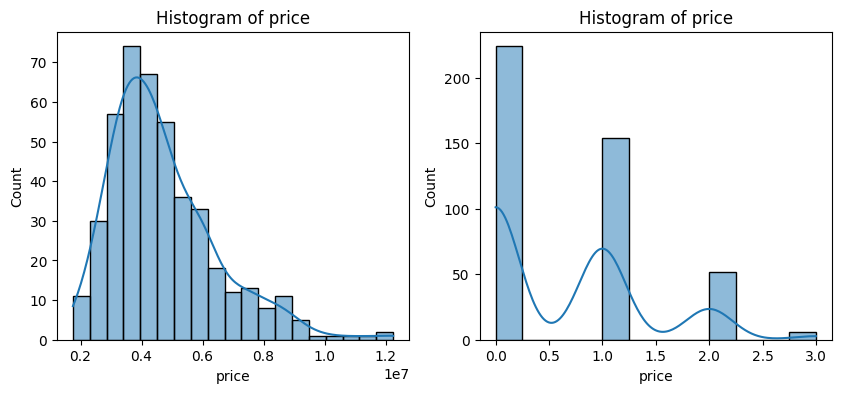

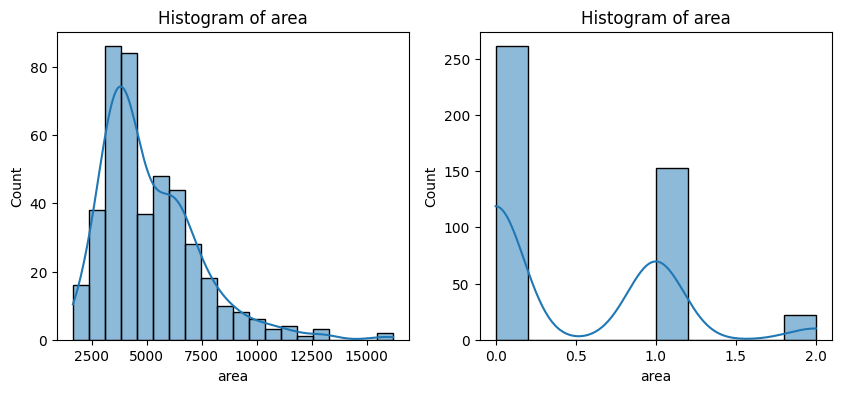

In [103]:
col = ['price','area']
for i in range(2):
    fig ,(ax1, ax2) = plt.subplots(ncols = 2, figsize=(10,4))
    sns.histplot(X_train, x=col[i], ax = ax1, kde=True)
    ax1.set_title(f"Histogram of {col[i]}")

    sns.histplot(X_train_trf, x =col[i], ax = ax2, kde=True)
    ax2.set_title(f"Histogram of {col[i]}")

    plt.show()